###**HOME CREDIT SCORE CARD PREDICTION**

Home Credit is currently using a variety of statistical and machine learning methods to make credit score predictions.
we can ensure that customers who are capable of making** repayments are not rejected** when applying for a loan, and that loans are made with a principal, maturity, and repayment calendar that will motivate customers to succeed.

Necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('/content/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_train.info(verbose=True)
print('Data Types : \n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DAYS_E

### celaning data

In [4]:
df_train.CODE_GENDER.value_counts()

F    2548
M    1316
Name: CODE_GENDER, dtype: int64

In [5]:
df_train.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     534
AMT_REQ_CREDIT_BUREAU_WEEK    534
AMT_REQ_CREDIT_BUREAU_MON     534
AMT_REQ_CREDIT_BUREAU_QRT     534
AMT_REQ_CREDIT_BUREAU_YEAR    534
Length: 122, dtype: int64

In [6]:
df_train[df_train['AMT_REQ_CREDIT_BUREAU_DAY'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
17,100021,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,104478,0,Cash loans,M,N,Y,0,112500.0,225000.0,14764.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3853,104507,1,Cash loans,M,N,Y,0,135000.0,254700.0,20119.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3859,104515,0,Cash loans,M,N,N,0,112500.0,270000.0,16645.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3861,104517,0,Cash loans,F,N,Y,0,78750.0,614574.0,17968.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_train.query('AMT_REQ_CREDIT_BUREAU_DAY== 0.0')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,104511,0,Cash loans,F,N,Y,2,112500.0,871029.0,44604.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3857,104513,0,Cash loans,F,N,Y,1,225000.0,770292.0,34938.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3858,104514,0,Revolving loans,M,N,Y,1,45000.0,180000.0,9000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3860,104516,1,Cash loans,F,N,Y,0,90000.0,900000.0,32017.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Because most of NA AMT_REQ_CREDIT_BUREAU_DAY has 0.0, we can impute this value with 0.0

In [8]:
df_train[df_train['AMT_REQ_CREDIT_BUREAU_DAY'].isna()] = 0.0

In [9]:
df_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

###EDA

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [ ]:
'''# define predictor variables
X = df_train.drop(["TARGET"], axis = 1)
# define target variable
y = df_train["TARGET"]

<ipython-input-30-e9130d526d7a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x="TARGET", palette='flare')


<Axes: xlabel='TARGET', ylabel='count'>

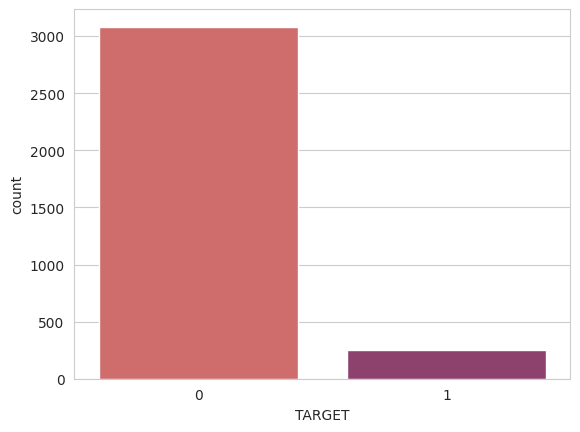

In [30]:
sns.countplot(data=df_train, x="TARGET", palette='flare')

dilihat dari diagram bahwa lebih banyak 0 dibandingkan 1, dimana 0 artinya nasabah tidak memiliki masalah dalam pembayaran kredit. disini dataset yang dimiliki imbalance

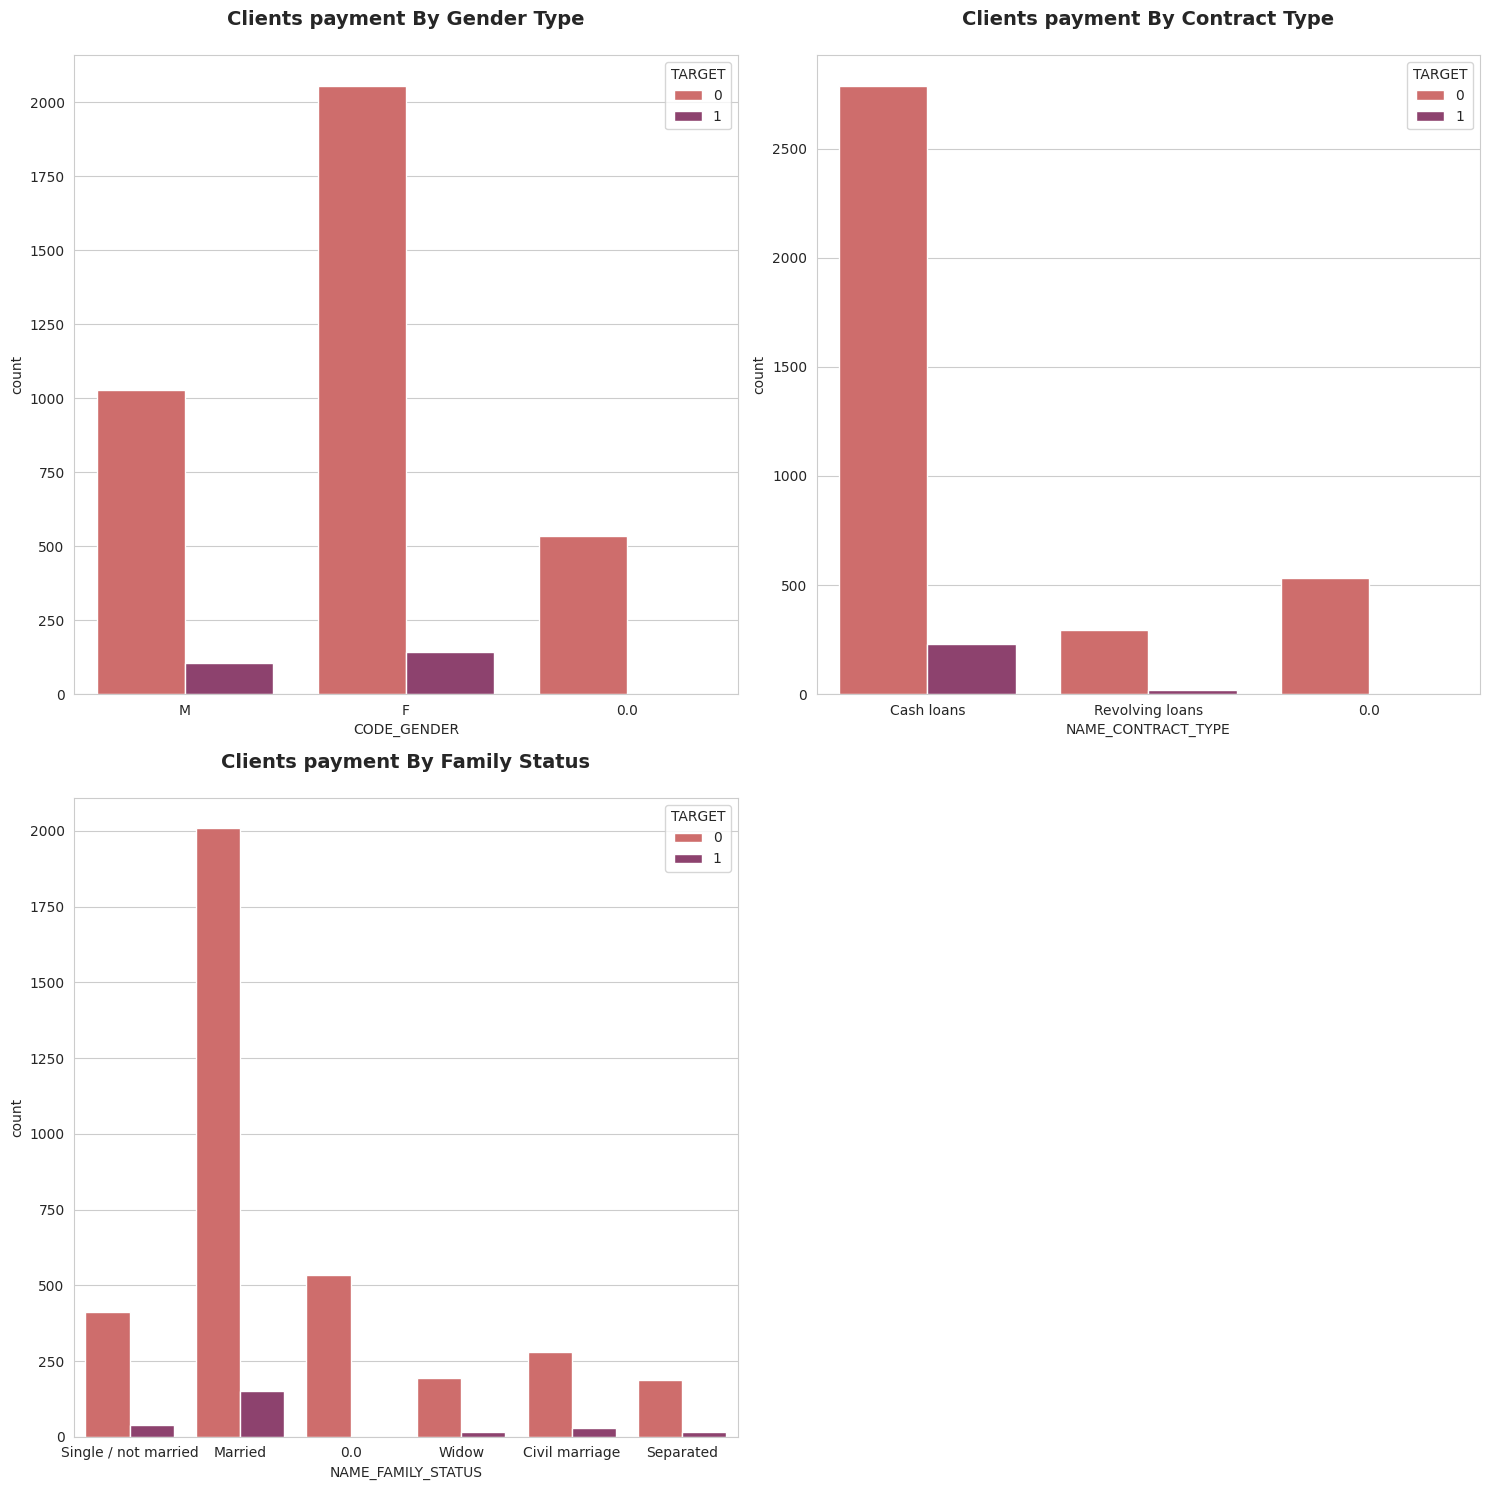

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style to whitegrid
sns.set_style('whitegrid')

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Plot untuk Clients payment By Gender Type
ax[0, 0].set_title('Clients payment By Gender Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data=df_train, hue='TARGET', palette='flare', ax=ax[0, 0])

# Plot untuk Clients payment By Contract Type
ax[0, 1].set_title('Clients payment By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data=df_train, hue='TARGET', palette='flare', ax=ax[0, 1])

# Plot untuk Clients payment By Family Status
ax[1, 0].set_title('Clients payment By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data=df_train, hue='TARGET', palette='flare', ax=ax[1, 0])

# Hapus subplot keempat
fig.delaxes(ax[1,1])

plt.tight_layout()
plt.show()


In [12]:
df_train['CODE_GENDER'] = df_train['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [13]:
#Menghapus baris yang memiliki nilai 0.0 di kolom CODE_GENDER
df_train = df_train[df_train['CODE_GENDER'] != 0.00]

In [14]:
# Mengonversi tipe data kolom 'TARGET' menjadi numerik jika itu adalah string
df_train['TARGET'] = df_train['TARGET'].astype(int)

In [15]:
ct = df_train.groupby(by=['CODE_GENDER', 'TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Client Payment By Code Gender')
ct_sorted = ct.sort_values(by=['CODE_GENDER', 'TARGET'])
ct.sort_values(by='SK_ID_CURR', ascending=False)
ct.style.background_gradient(cmap='Blues')

Client Payment By Code Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,0,2055
1,Female,1,143
2,Male,0,1027
3,Male,1,105


In [16]:
df_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,Male,0.092756
0,Female,0.065059


terlihat bahwa yang paling banyak mengajukan pinjaman adalah perempuan yaitu sekitar 2.198, sedangkan laki-laki 1.132.
akan tetapi 9% laki-laki memiliki masalah dalam membayar pinjaman, sedangkan perempuan 6%.

contract type, code gender vs target

In [17]:
ct = df_train.groupby(by=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Client Payment By Contract Type')
ct_sorted = ct.sort_values(by=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'TARGET'])
ct.sort_values(by='SK_ID_CURR', ascending=False)
ct.style.background_gradient(cmap='Blues')

Client Payment By Contract Type


,NAME_CONTRACT_TYPE,CODE_GENDER,TARGET,SK_ID_CURR
0,Cash loans,Female,0,1871
1,Cash loans,Female,1,135
2,Cash loans,Male,0,917
3,Cash loans,Male,1,95
4,Revolving loans,Female,0,184
5,Revolving loans,Female,1,8
6,Revolving loans,Male,0,110
7,Revolving loans,Male,1,10


suite type vs target

In [18]:
st = df_train.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Payment By Suite Type')
st.sort_values(by='SK_ID_CURR', ascending=False)
# Menampilkan hasil dengan gaya latar belakang gradient
display(st.sort_values(by='SK_ID_CURR', ascending=False).style.background_gradient(cmap='Blues'))

Clients Payment By Suite Type


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
11,Unaccompanied,0,2502
2,Family,0,412
12,Unaccompanied,1,203
9,"Spouse, partner",0,109
3,Family,1,32
0,Children,0,25
7,Other_B,0,19
10,"Spouse, partner",1,8
5,Other_A,0,5
1,Children,1,3


Income type vs target

In [19]:
st = df_train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Payment By INCOME Type')
st.sort_values(by='SK_ID_CURR', ascending=False)
# Menampilkan hasil dengan gaya latar belakang gradient
display(st.sort_values(by='SK_ID_CURR', ascending=False).style.background_gradient(cmap='Blues'))

Clients Payment By INCOME Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
7,Working,0,1577
0,Commercial associate,0,731
2,Pensioner,0,570
4,State servant,0,203
8,Working,1,158
1,Commercial associate,1,51
3,Pensioner,1,32
5,State servant,1,7
6,Unemployed,0,1


In [20]:
df_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
4,Working,0.091066
0,Commercial associate,0.065217
1,Pensioner,0.053156
2,State servant,0.033333
3,Unemployed,0.000000


rata2 yang mengalami permasalahan dalam membayar pinjaman adalah pekerja, commercial associate dan pensiunan. namun yang paling banyak yaitu pekerja

Income Type, Amount of Credit, Target, and Contract Type

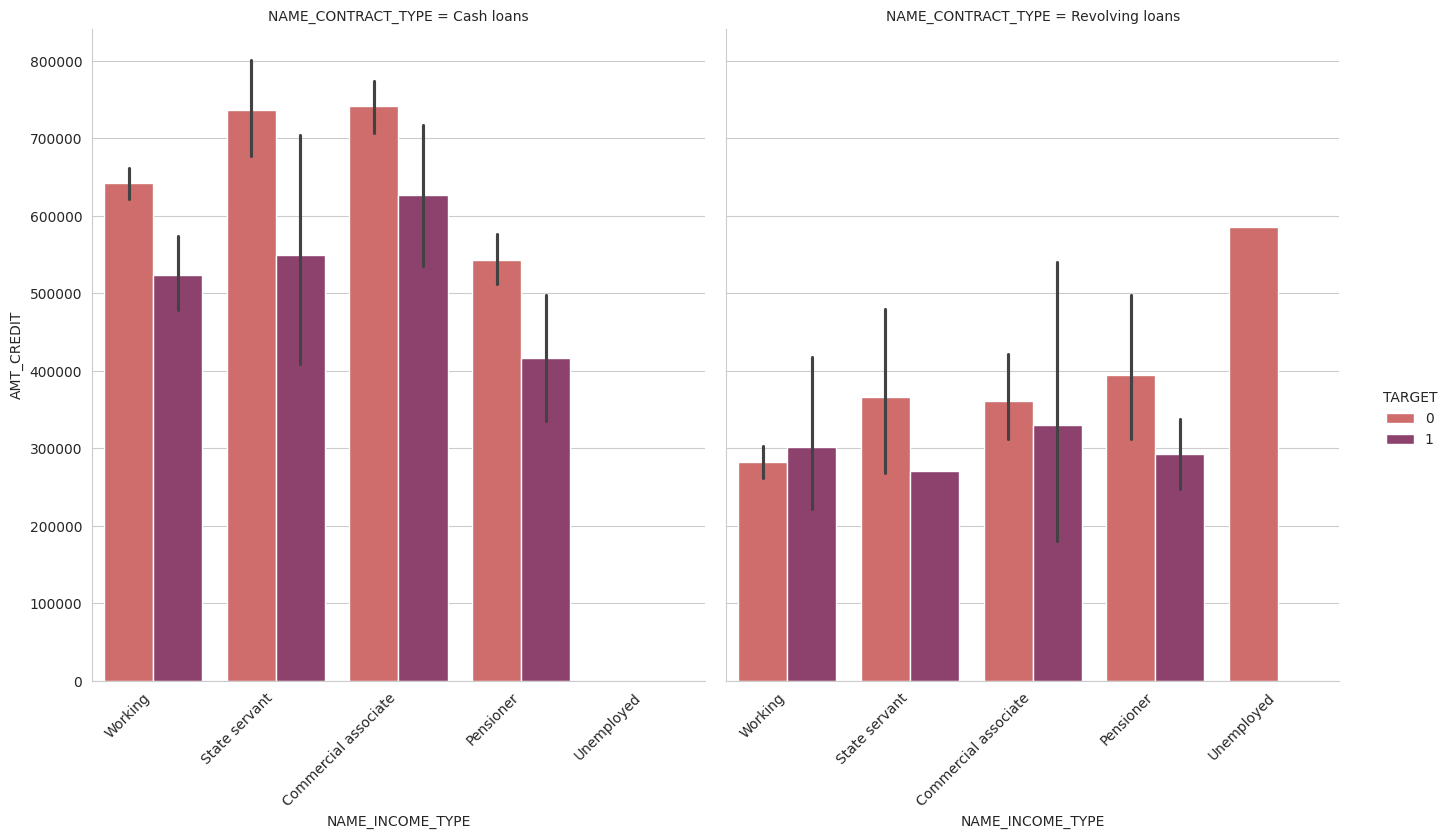

In [31]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'NAME_CONTRACT_TYPE',
            kind = 'bar', palette = 'flare',
            data = df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

Name Family Status Vs Target

In [32]:
st = df_train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Payment By Family Status')
st.sort_values(by='SK_ID_CURR', ascending=False)
# Menampilkan hasil dengan gaya latar belakang gradient
display(st.sort_values(by='SK_ID_CURR', ascending=False).style.background_gradient(cmap='Blues'))

Clients Payment By Family Status


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
2,Married,0,2009
6,Single / not married,0,413
0,Civil marriage,0,279
8,Widow,0,194
4,Separated,0,187
3,Married,1,150
7,Single / not married,1,39
1,Civil marriage,1,29
5,Separated,1,16
9,Widow,1,14


In [33]:
df_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.094156
3,Single / not married,0.086283
2,Separated,0.078818
1,Married,0.069477
4,Widow,0.067308


ternyata pernikahan sipil cenderung memiliki persentase yang tinggi permasalahan dalam membayar pinjaman

In [34]:
st = df_train.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Payment By OCCUPATION TYPE')
st.sort_values(by='SK_ID_CURR', ascending=False)
# Menampilkan hasil dengan gaya latar belakang gradient
display(st.sort_values(by='SK_ID_CURR', ascending=False).style.background_gradient(cmap='Blues'))

Clients Payment By OCCUPATION TYPE


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
14,Laborers,0,535
26,Sales staff,0,330
6,Core staff,0,288
18,Managers,0,207
8,Drivers,0,201
0,Accountants,0,105
20,Medicine staff,0,95
11,High skill tech staff,0,94
30,Security staff,0,66
4,Cooking staff,0,61


In [35]:
df_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.133333
2,Cooking staff,0.128571
13,Realty agents,0.125000
1,Cleaning staff,0.108108
8,Laborers,0.102349
12,Private service staff,0.100000
6,High skill tech staff,0.096154
11,Medicine staff,0.095238
4,Drivers,0.090498
16,Security staff,0.083333


Low-Skill laboers memiliki presentase yang tinggi dalam permasalahan membayar pinjaman sekitar 13%

### MACHINE LEARNING MODELS

##Feature Selection

menghapus SK_ID_CURR

In [36]:
df_train = df_train.drop(["SK_ID_CURR"], axis = 1)

## Label encoder

In [37]:
from sklearn.preprocessing import LabelEncoder  # Menambahkan import LabelEncoder

# Menggunakan LabelEncoder untuk mengubah kolom-kolom kategori menjadi bilangan bulat
df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
          "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
                                           "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                                           "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [38]:
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


##feature selection memisahkan variabel dan target

In [39]:
x = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

## mengatasi data yang tidak seimbang

In [40]:
from sklearn.utils import resample

# membuat 2 dataframe yang berbeda dataframe kelas mayoritas dan minoritas
df_majority = df_train[df_train['TARGET'] == 0]
df_minority = df_train[df_train['TARGET'] == 1]

# menentukan jumlah sampel untuk resampling agar seimbang
n_samples_minority = len(df_majority)  # Anda bisa mencoba menyesuaikan jumlah sampel minoritas dengan mayoritas
n_samples_majority = len(df_majority)

# upsample kelas minoritas
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=n_samples_minority,
                                 random_state=42)

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

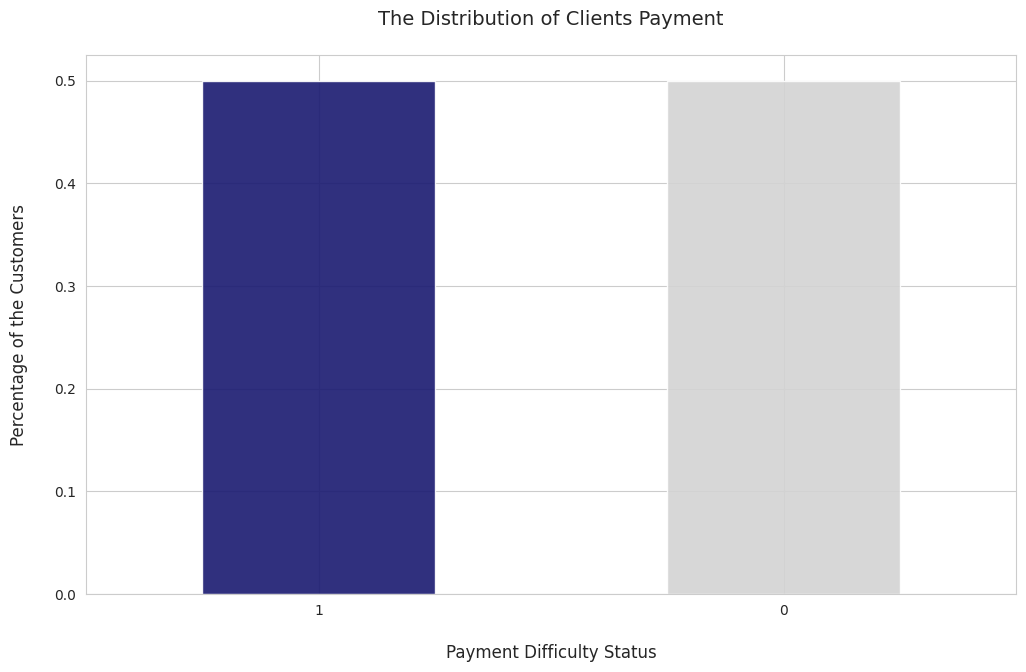

In [41]:
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Payment\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

##SPLITTING DATA

In [42]:
# define x and y features (top 20 features)
x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = df_upsampled['TARGET']

In [43]:
# splitting tha data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(4931, 20) (1233, 20)


In [44]:
from sklearn.preprocessing import StandardScaler
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### 1. Logistice Regression

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Inisialisasi imputer dengan strategi pengisian nilai hilang (misalnya, dengan mean)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputer pada data pelatihan
X_train_imputed = imputer.fit_transform(X_train)

# Latih model dengan data yang telah diisi nilai yang hilang
log_model = LogisticRegression().fit(X_train_imputed, y_train)


In [46]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Inisialisasi imputer dengan strategi pengisian nilai hilang (misalnya, dengan mean)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputer pada data pelatihan
X_train_imputed = imputer.fit_transform(X_train)

# Latih model dengan data yang telah diisi nilai yang hilang
log_model = LogisticRegression().fit(X_train_imputed, y_train)

# Buat prediksi pada data pelatihan yang telah diisi nilai yang hilang
y_train_pred_log = log_model.predict(X_train_imputed)

# Cetak laporan klasifikasi
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      2482
           1       0.71      0.69      0.70      2449

    accuracy                           0.71      4931
   macro avg       0.71      0.71      0.71      4931
weighted avg       0.71      0.71      0.71      4931



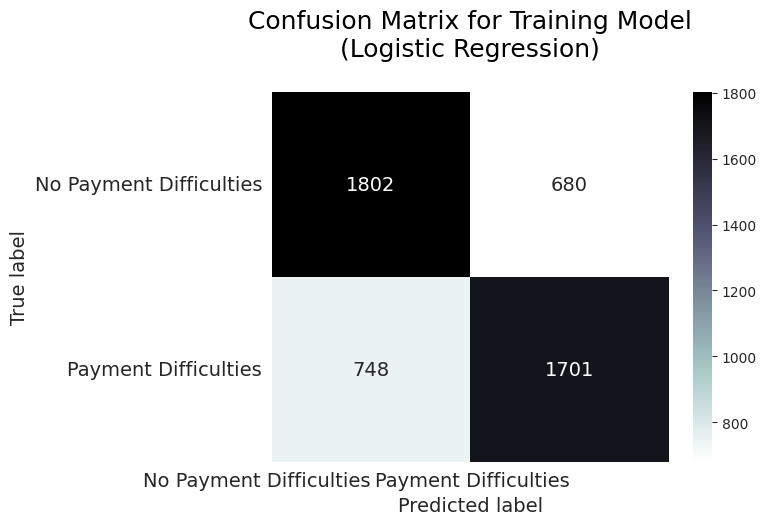

In [47]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [48]:
from sklearn.impute import SimpleImputer

# Inisialisasi imputer dengan strategi pengisian nilai hilang (misalnya, dengan mean)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputer pada data uji
X_test_imputed = imputer.fit_transform(X_test)

# Buat prediksi pada data uji yang telah diisi nilai yang hilang
y_test_pred_log = log_model.predict(X_test_imputed)

# Cetak laporan klasifikasi untuk data uji
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))


Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       600
           1       0.72      0.68      0.70       633

    accuracy                           0.70      1233
   macro avg       0.70      0.70      0.70      1233
weighted avg       0.70      0.70      0.70      1233



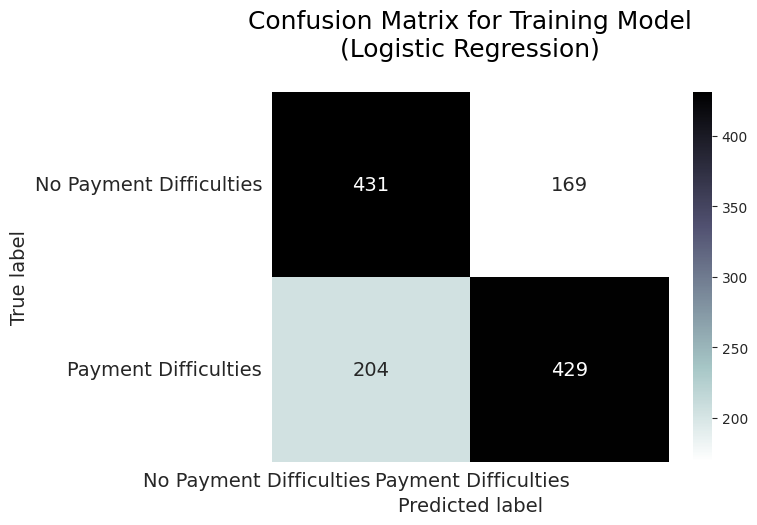

In [49]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [50]:
from sklearn.impute import SimpleImputer

# Inisialisasi imputer dengan strategi pengisian nilai hilang (misalnya, dengan mean)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputer pada data pelatihan
X_train_imputed = imputer.fit_transform(X_train)

# Hitung akurasi model pada data pelatihan yang telah diisi nilai yang hilang
acc_log_train = round(log_model.score(X_train_imputed, y_train) * 100, 2)

# Hitung akurasi model pada data uji yang telah diisi nilai yang hilang
acc_log_test = round(log_model.score(X_test_imputed, y_test) * 100, 2)

# Cetak akurasi model pada data pelatihan dan data uji
print("Training Accuracy: {}%".format(acc_log_train))
print("Test Accuracy: {}%".format(acc_log_test))


Training Accuracy: 71.04%
Test Accuracy: 69.75%


logistic memberikan hasil 71.4% prediksi benar
margin erornya 1.65%

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


# Inisialisasi imputer dengan strategi pengisian nilai hilang (misalnya, dengan mean)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputer pada data pelatihan
X_train_imputed = imputer.fit_transform(X_train)

# Latih model RandomForestClassifier pada data pelatihan yang telah diisi nilai yang hilang
rf_model = RandomForestClassifier().fit(X_train_imputed, y_train)

# Cetak model
print(rf_model)

RandomForestClassifier()


In [52]:
from sklearn.impute import SimpleImputer

# Inisialisasi imputer dengan strategi pengisian nilai hilang (misalnya, dengan mean)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputer pada data tes
X_test_imputed = imputer.fit_transform(X_test)

# Lakukan prediksi pada data tes yang telah diisi nilai yang hilang
y_test_pred_rf = rf_model.predict(X_test_imputed)

# Cetak laporan klasifikasi
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))


Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       600
           1       1.00      0.36      0.53       633

    accuracy                           0.67      1233
   macro avg       0.80      0.68      0.64      1233
weighted avg       0.80      0.67      0.64      1233



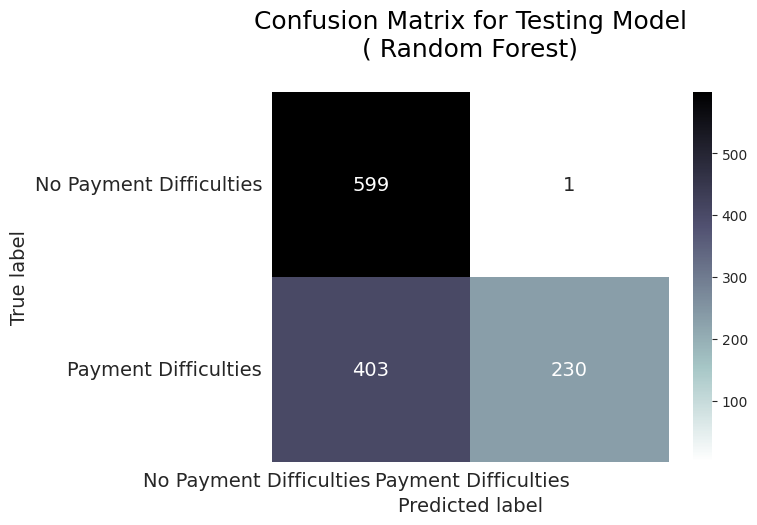

In [53]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n( Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [54]:
from sklearn.impute import SimpleImputer

# Inisialisasi imputer dengan strategi pengisian nilai hilang (misalnya, dengan mean)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputer pada data tes
X_train_imputed = imputer.fit_transform(X_train)

# Lakukan prediksi pada data tes yang telah diisi nilai yang hilang
y_train_pred_rf = rf_model.predict(X_train_imputed)

# Cetak laporan klasifikasi
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred_rf))


Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2482
           1       1.00      1.00      1.00      2449

    accuracy                           1.00      4931
   macro avg       1.00      1.00      1.00      4931
weighted avg       1.00      1.00      1.00      4931



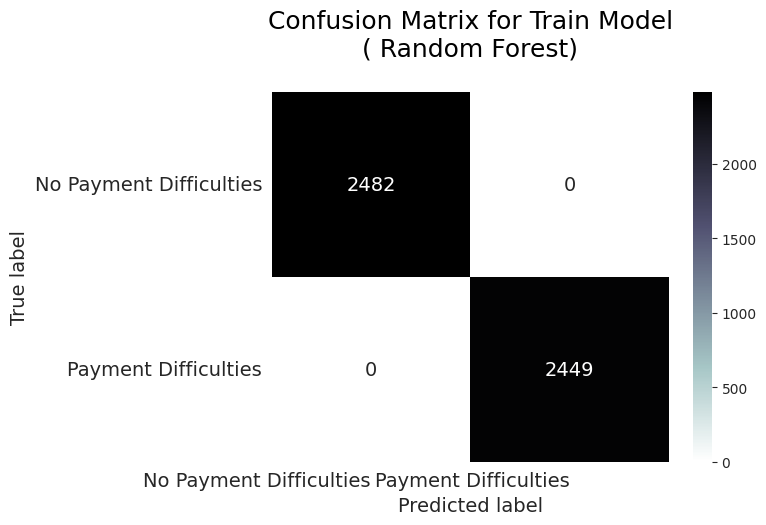

In [55]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Train Model\n( Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [56]:
from sklearn.impute import SimpleImputer

# Inisialisasi imputer dengan strategi pengisian nilai hilang (misalnya, dengan mean)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputer pada data pelatihan
X_train_imputed = imputer.fit_transform(X_train)

# Hitung akurasi model pada data pelatihan yang telah diisi nilai yang hilang
acc_rf_train = round(rf_model.score(X_train_imputed, y_train) * 100, 2)

# Hitung akurasi model pada data uji yang telah diisi nilai yang hilang
acc_rf_test = round(rf_model.score(X_test_imputed, y_test) * 100, 2)

# Cetak akurasi model pada data pelatihan dan data uji
print("Training Accuracy: {}%".format(acc_rf_train))
print("Test Accuracy: {}%".format(acc_rf_test))

Training Accuracy: 100.0%
Test Accuracy: 67.23%


Random Forest memberikan hasil 100% prediksi benar margin erornya 33%

<ipython-input-57-c801a24fbf4b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


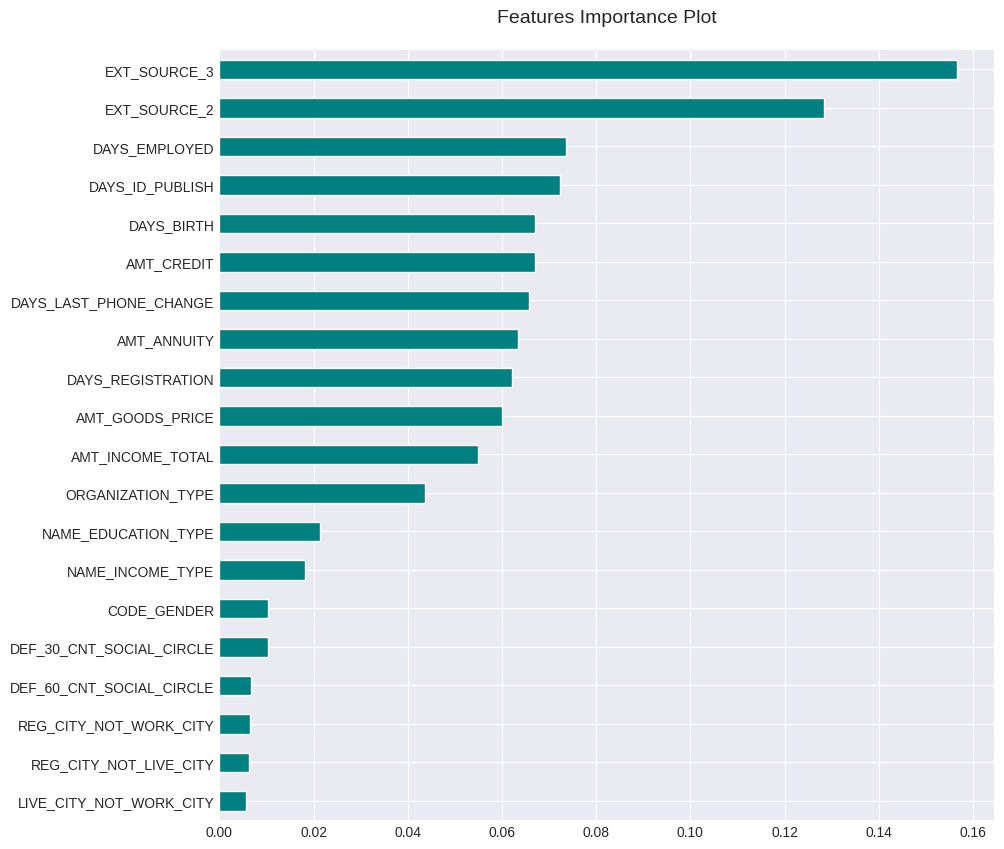

In [57]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')